# Bluetab (Default of Credit Card Clients)

In [299]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier, XGBRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix, average_precision_score, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [300]:
df = pd.read_excel('default of credit card clients.xls', header=1, index_col=0)

In [301]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Análisis exploratorio

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

Todas las variables son números enteros, incluidas las categóricas, por lo cual no es necesaria una transformación pero se debe tener en cuenta.

In [303]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [304]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No hay valores faltantes. Se cambia el nombre de la variable categórica objetivo para facilitar la lectura.

In [305]:
df.rename(columns={"default payment next month": "default"}, inplace=True)

Se observa la distribución de las variables categóricas así como la proporción de cada categoría.

default
0    77.88
1    22.12
Name: proportion, dtype: float64


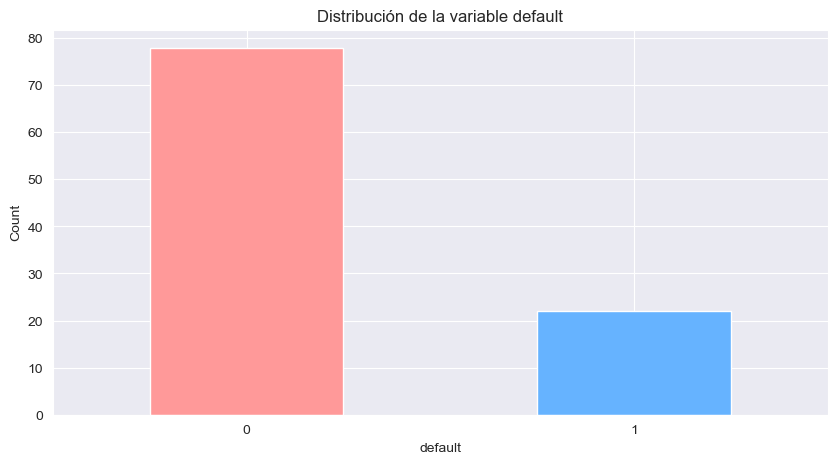

SEX
2    60.373333
1    39.626667
Name: proportion, dtype: float64


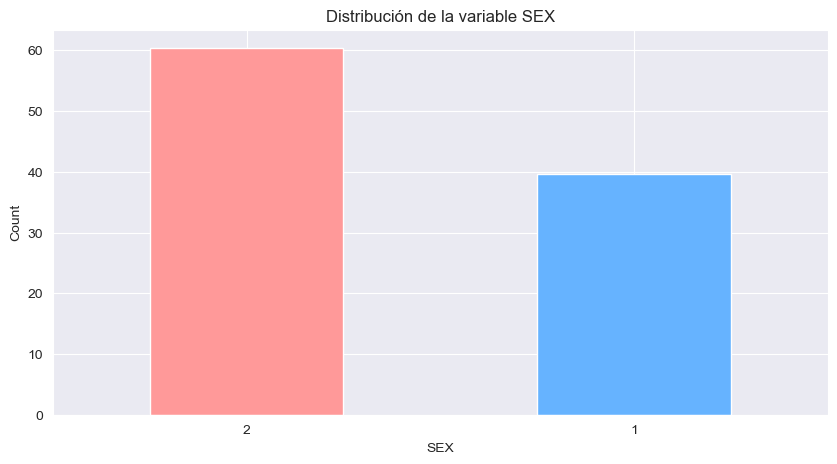

EDUCATION
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: proportion, dtype: float64


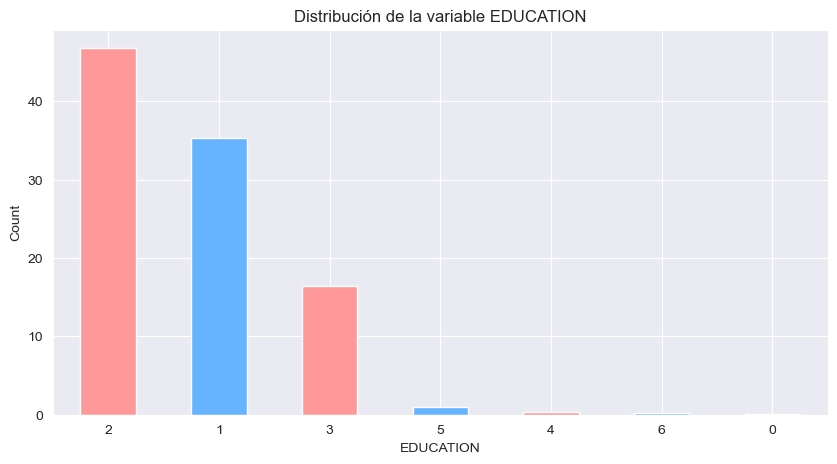

MARRIAGE
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: proportion, dtype: float64


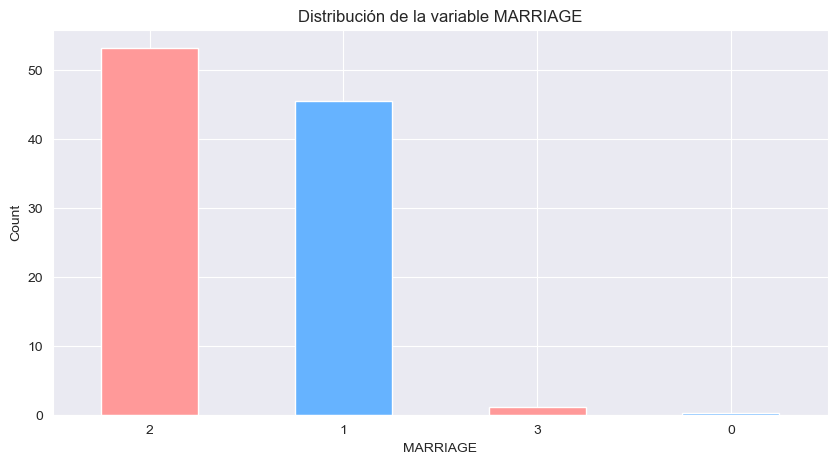

PAY_0
 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: proportion, dtype: float64


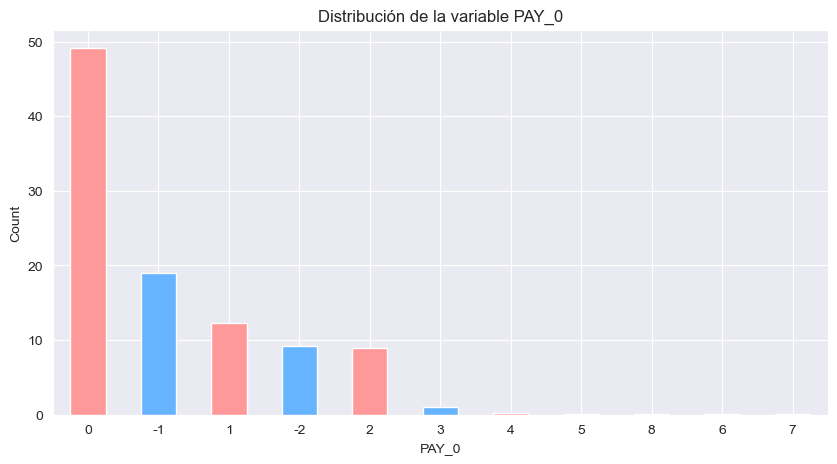

PAY_2
 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: proportion, dtype: float64


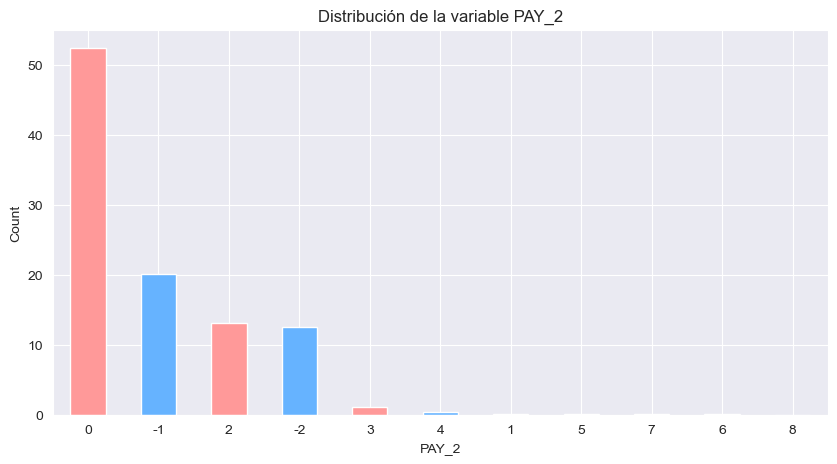

PAY_3
 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: proportion, dtype: float64


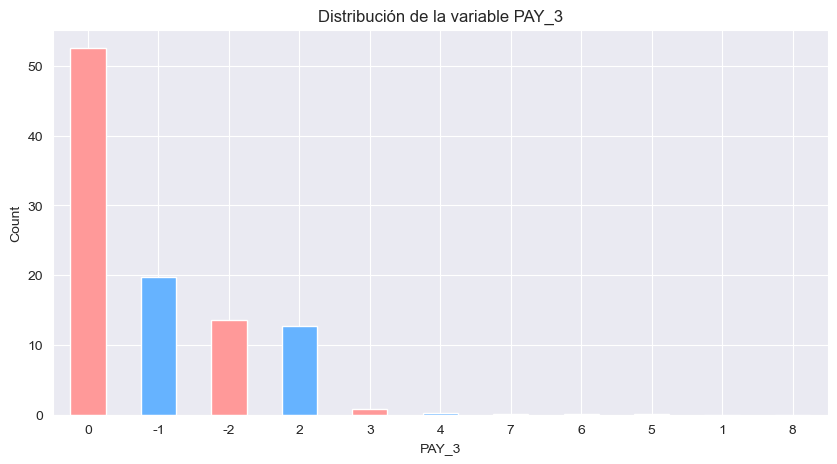

PAY_4
 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0.193333
 5     0.116667
 6     0.016667
 1     0.006667
 8     0.006667
Name: proportion, dtype: float64


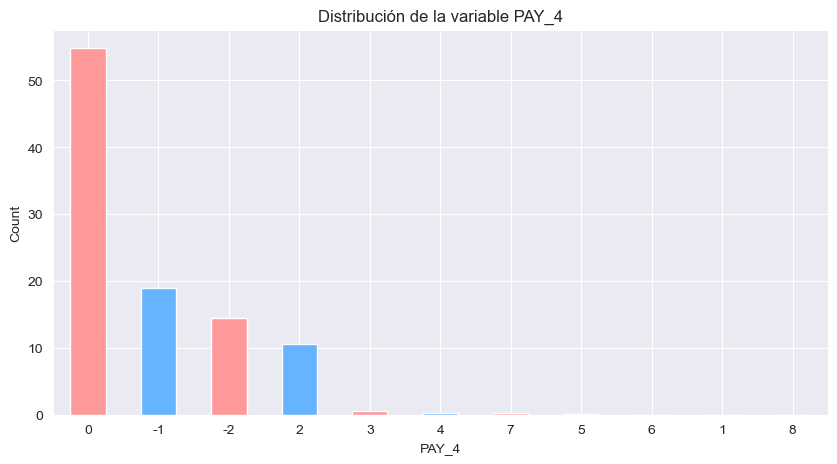

PAY_5
 0    56.490000
-1    18.463333
-2    15.153333
 2     8.753333
 3     0.593333
 4     0.280000
 7     0.193333
 5     0.056667
 6     0.013333
 8     0.003333
Name: proportion, dtype: float64


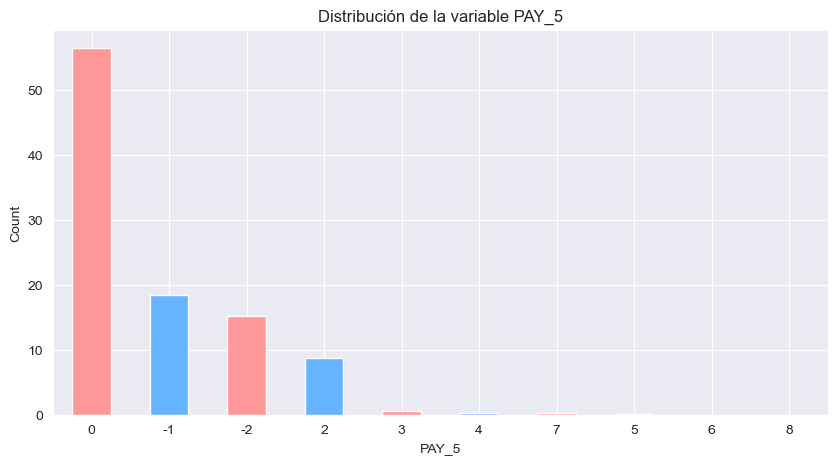

PAY_6
 0    54.286667
-1    19.133333
-2    16.316667
 2     9.220000
 3     0.613333
 4     0.163333
 7     0.153333
 6     0.063333
 5     0.043333
 8     0.006667
Name: proportion, dtype: float64


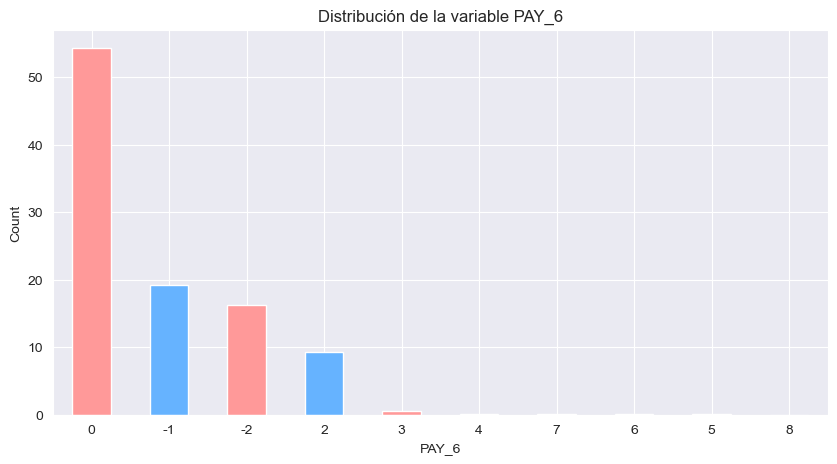

In [306]:
cat = df[['default', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

for i in cat.columns:
    (df[i].value_counts(normalize=True)*100).plot(kind='bar', figsize=(10, 5), color=['#FF9999', '#66B3FF'])
    plt.title(f'Distribución de la variable {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    print(df[i].value_counts(normalize=True)*100)
    plt.show()

Para la variable default destaca que aquellos que pagan son el 77.8%, mientras que los que no, son el restante 22.1%. Es decir, hay un desbalance de los datos. Por lo que en el modelado se debe tomar en cuenta esta diferencia en las categorías.

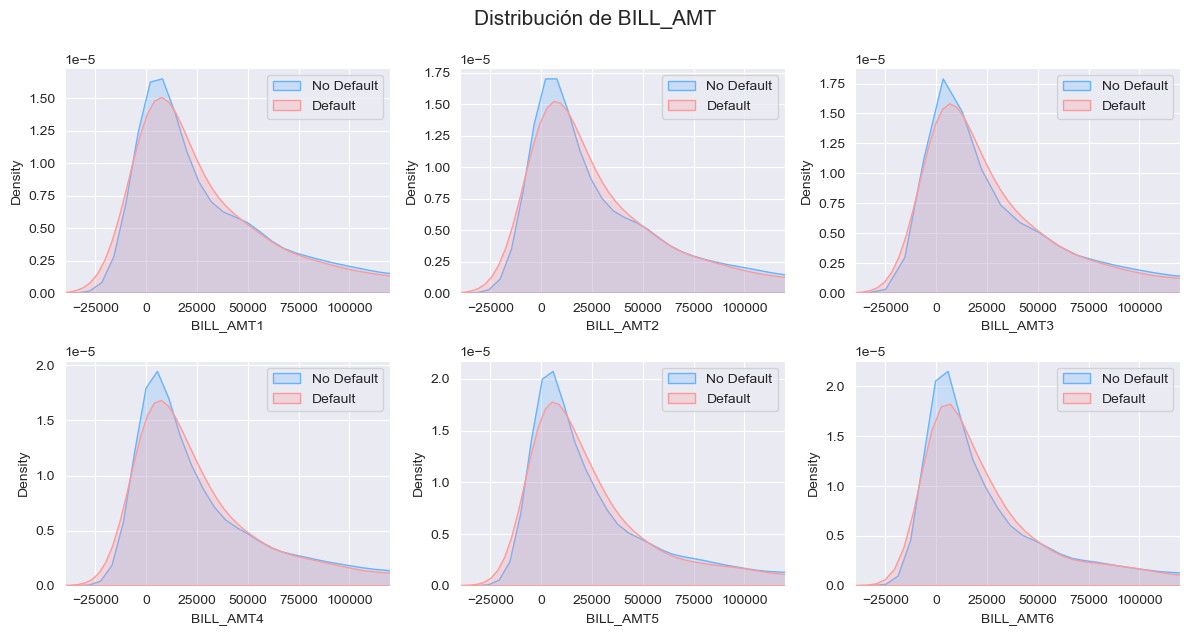

In [307]:
BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(BILL_AMT_cols):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['default'] == 0), col], label = 'No Default',color='#66B3FF', shade=True)
    sns.kdeplot(df.loc[(df['default'] == 1), col], label = 'Default', color='#FF9999', shade=True)
    plt.xlim(-40000,120000)
    plt.legend()
    plt.tight_layout()
plt.suptitle('Distribución de BILL_AMT', fontsize=15, y=1.05)
plt.show()

Se observa para el caso de la variable estado de cuenta, que aquellos clientes que pagan tienen un monto de estado de cuenta mayor que aquellos que incurren en impago.

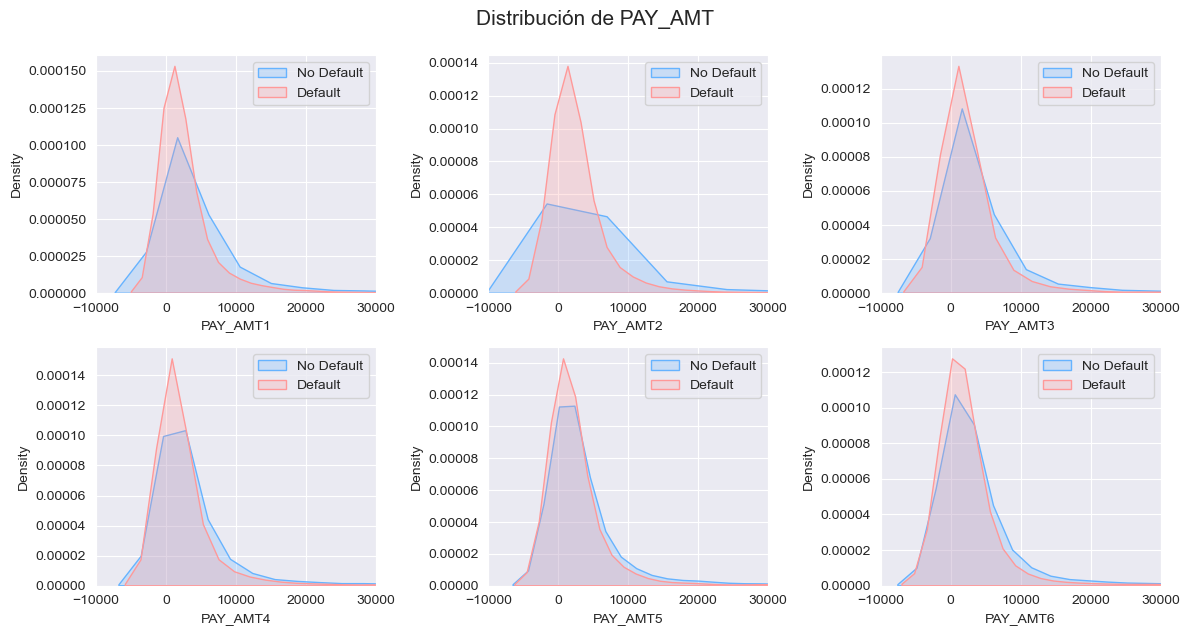

In [308]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['default'] == 0), col], label = 'No Default',color='#66B3FF', shade=True)
    sns.kdeplot(df.loc[(df['default'] == 1), col], label = 'Default', color='#FF9999', shade=True)
    plt.xlim(-10000,30000)
    plt.legend()
    plt.tight_layout()
plt.suptitle('Distribución de PAY_AMT', fontsize=15, y=1.05)
plt.show()

Para el caso del monto del pago anterior, todos los meses presentan un comportamiento similar excepto en el mes de agosto en donde hay una marcada diferencia en la proporción de los clientes que pagan y los que no.

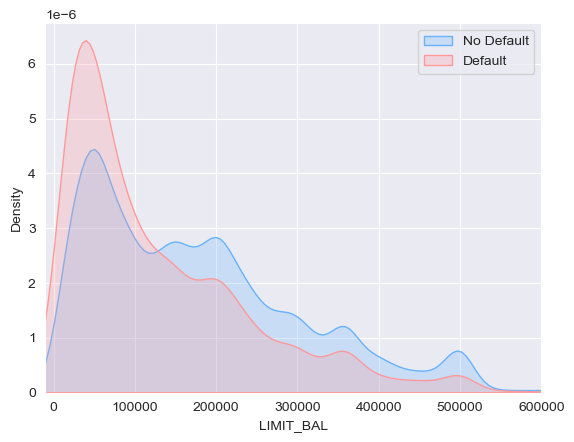

In [309]:
sns.kdeplot(df.loc[(df['default'] == 0), 'LIMIT_BAL'], label = 'No Default', color='#66B3FF', shade=True)
sns.kdeplot(df.loc[(df['default'] == 1), 'LIMIT_BAL'], label = 'Default', color='#FF9999', shade=True)
plt.xlim(-10000,600000)
plt.legend()

Por su parte, el límite crediticio tiene un comportamiento esperado; los clientes que incurren en impago tiene un menor límite crediticio que aquellos que pagan; pues a medida que se paga en tiempo, el límite aumenta. En particular parece existir un punto de corte alrededor de los 120,000.

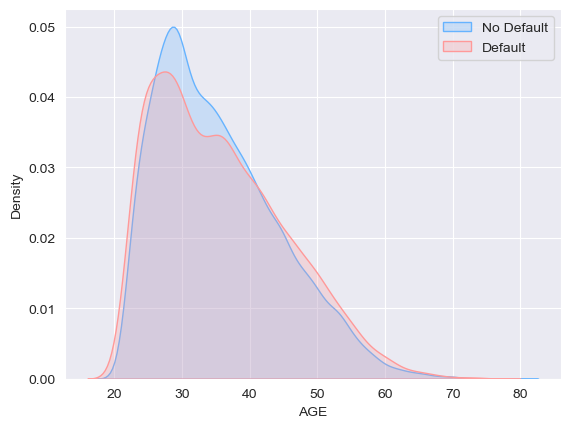

In [310]:
sns.kdeplot(df.loc[(df['default'] == 0), 'AGE'], label = 'No Default', color='#66B3FF', shade=True)
sns.kdeplot(df.loc[(df['default'] == 1), 'AGE'], label = 'Default', color='#FF9999', shade=True)
plt.legend()

Finalmente, la edad también tiene una distribución marcada, pues entre los 26 y los 40 hay una mayor proporción de clientes que si pagan.

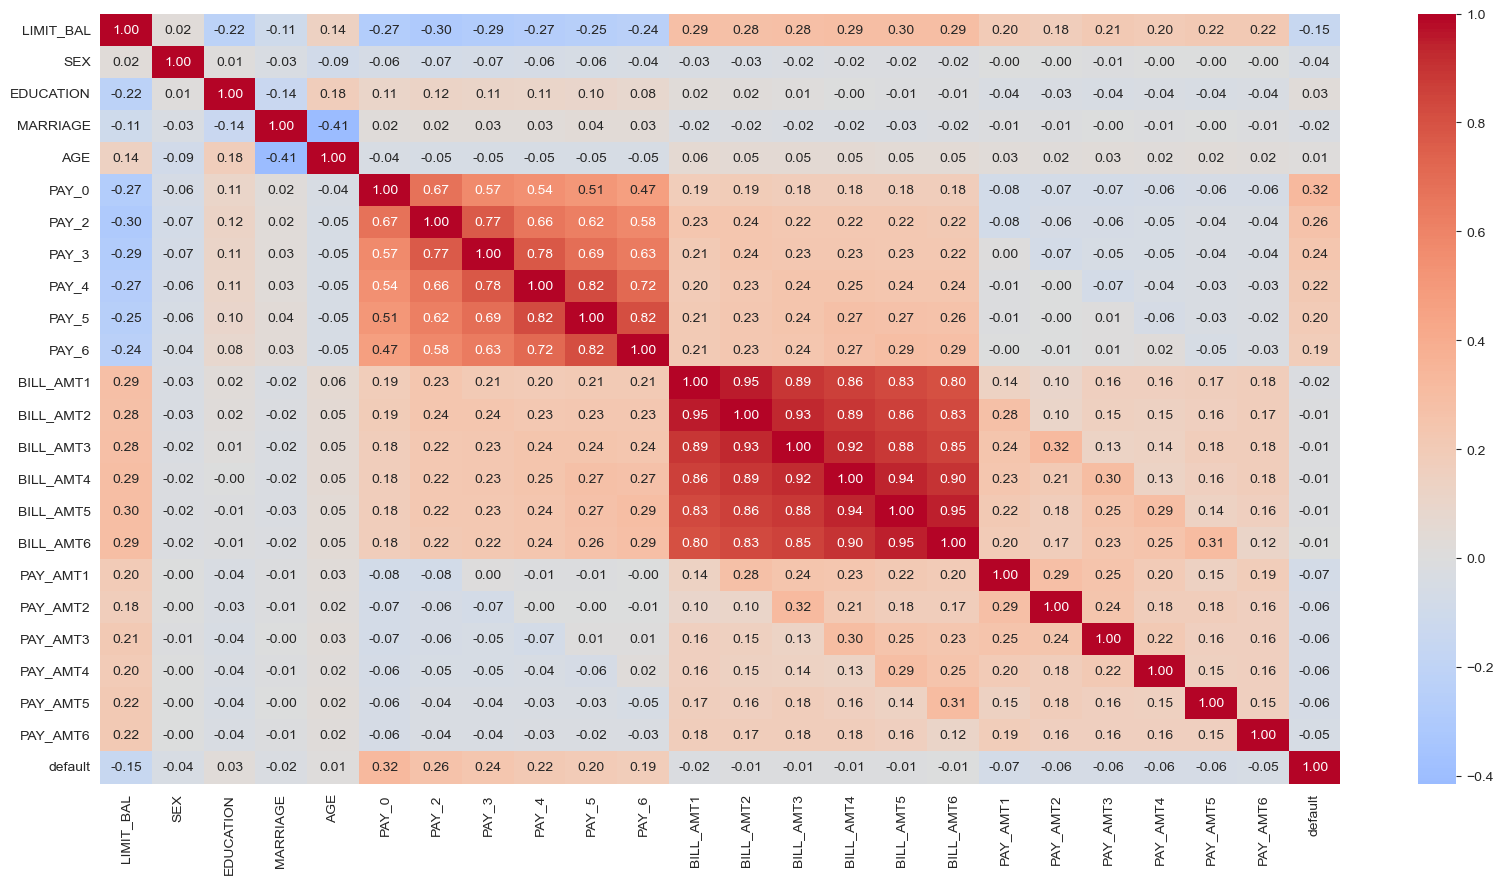

In [311]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

Con la matriz de correlación, se observa que las variables con mayor coeficiente son los montos del estado de cuenta con respecto a los meses anteriores y el monto del pago del mes previo. No obstante, se destaca que la variable default no cuenta con una correlación alta para la mayoría de las variables y las de mayor coeficiente no pasan del 0.32, siendo estas el estado del pago en cada mes.

# Limpieza y creación de variables

Se agrupan categorías con una representación baja en una sola para el caso de educación y estado marital. Para el estado de pago se agrupan las primeras categorías para dejar solo el estado del pago a través de los meses.

In [312]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

Al realizar dos modelos (uno para la variable default y otro para el monto del pago en el mes de junio se crean dos datasets)

In [313]:
df_def = df.copy()
df_pay = df.copy()

In [314]:
df_def[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = df_def[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].replace({-2: 0, -1: 0})

A partir de los primeras pruebas realizadas destaca la necesidad de crear variables que ayuden a reflejar desde otra perspectiva el comportamiento de los clientes con sus pagos.

In [315]:
df_def['avg_bill_amt'] = df_def[[f'BILL_AMT{i}' for i in range(1, 7)]].mean(axis=1)
df_def['avg_bill_limit_ratio'] = df_def[[f'BILL_AMT{i}' for i in range(1, 7)]].mean(axis=1) / df_def['LIMIT_BAL']
df_def['num_delays'] = df_def[[f'PAY_{i}' for i in range(1, 7)]].apply(lambda row: (row > 0).sum(), axis=1)
df_def['max_delay'] = df_def[[f'PAY_{i}' for i in range(1, 7)]].max(axis=1)
df_def['std_delay'] = df_def[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].std(axis=1)

A partir de estas variables se busca capturar más información en el estado de los pagos, como el máximo número de meses con retraso, la cantidad de meses con retraso de pago, si el retraso fue un caso atípico (sólo una vez incurrió en impago) o es común en el cliente. Además, para el caso del monto del estado de cuenta las nuevas variables buscan capturar el monto promedio y la proporción del límite de crédito respecto al estado de cuenta promedio.

# Modelado

### Default

Debido a que la variable a predecir tiene un desbalanceo en las clases, se hará primeramente uso del algoritmo BalancedRandomForestClassifier. Se procede a realizar otros conjuntos de modelos de clasificación con un escalador (en los casos necesarios), así como con over-sampling (SMOTE) y under-sampling (Cluster centroid)

In [316]:
y_def = df_def['default']
X_def = df_def.drop(columns=['default'])

X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.2, random_state=42, stratify=y_def)

In [317]:
model = BalancedRandomForestClassifier(random_state=42, max_depth=10, bootstrap=False, sampling_strategy='all', replacement=True)

model.fit(X_train_def, y_train_def)
y_pred_def = model.predict(X_test_def)

print(classification_report(y_test_def, y_pred_def))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.47      0.61      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



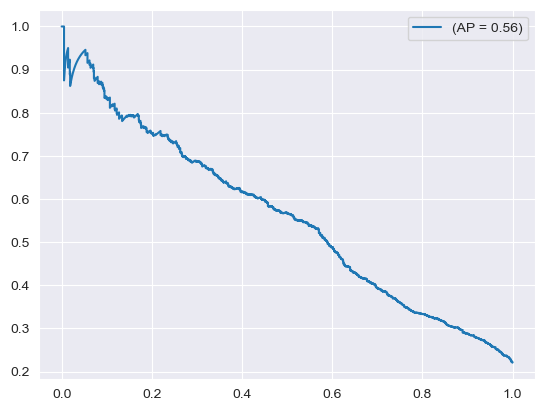

In [318]:
y_pred_proba = model.predict_proba(X_test_def)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_def, y_pred_proba)
ap = average_precision_score(y_test_def, y_pred_proba)
plt.plot(recall, precision, label=f'(AP = {ap:.2f})')
plt.legend()

No Scaler Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.60      0.70      4673
           1       0.30      0.61      0.40      1327

    accuracy                           0.60      6000
   macro avg       0.57      0.61      0.55      6000
weighted avg       0.72      0.60      0.64      6000

Scaler Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      4673
           1       0.45      0.58      0.51      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000

SMOTE + Scaler Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      4673
           1       0.43      0.56      0.49      1327

    accuracy                           0.74      6000
   macro avg       0.65 

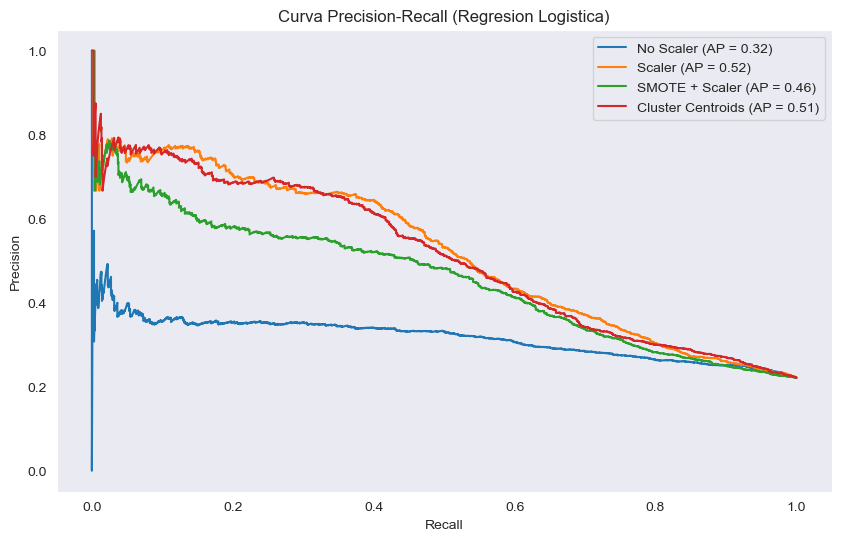

In [319]:
pipelines = {
    "No Scaler": Pipeline([
        ('model', LogisticRegression(random_state=42, class_weight='balanced', max_iter=100))
    ]),
    "Scaler": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42, class_weight='balanced', max_iter=100))
    ]),
    "SMOTE + Scaler": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42, class_weight='balanced', max_iter=100))
    ]),
    "Cluster Centroids": ImbPipeline([
        ('cluster', ClusterCentroids(random_state=42, sampling_strategy=0.5)),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42, class_weight='balanced', max_iter=100))
    ])
}

plt.figure(figsize=(10, 6))
for name, pipeline in pipelines.items():
    pipeline.fit(X_train_def, y_train_def)
    y_pred_proba = pipeline.predict_proba(X_test_def)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_def, y_pred_proba)
    ap = average_precision_score(y_test_def, y_pred_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')
    print(f"{name} Classification Report:\n", classification_report(y_test_def, pipeline.predict(X_test_def)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Regresion Logistica)')
plt.legend()
plt.grid()
plt.show()

RFC Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      4673
           1       0.50      0.58      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000

SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4673
           1       0.54      0.52      0.53      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000

Cluster Centroids Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      4673
           1       0.39      0.71      0.51      1327

    accuracy                           0.69      6000
   macro avg       0.64     

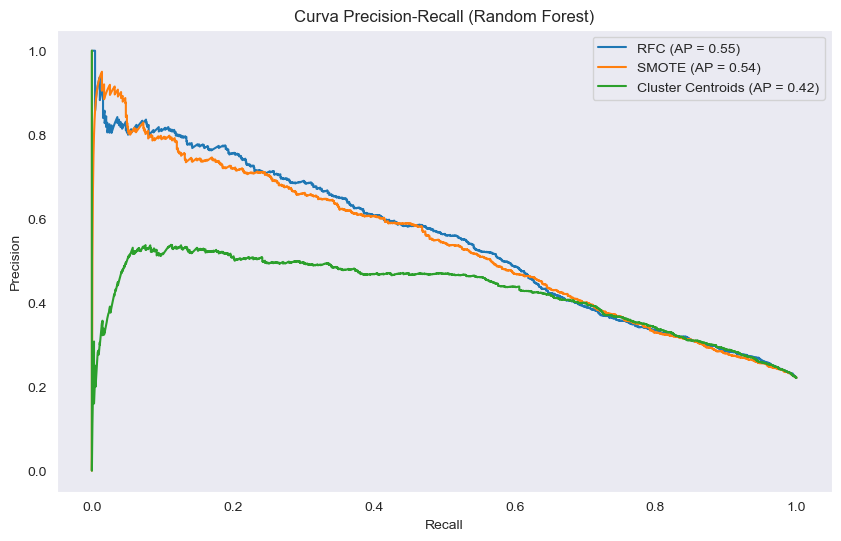

In [320]:
pipelines = {
    "RFC": Pipeline([
        ('model', RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, n_estimators=100))
    ]),
    "SMOTE": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100))
    ]),
    "Cluster Centroids": ImbPipeline([
        ('cluster', ClusterCentroids(random_state=42, sampling_strategy=0.4)),
        ('model', RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, n_estimators=100))
    ])
}

plt.figure(figsize=(10, 6))
for name, pipeline in pipelines.items():
    pipeline.fit(X_train_def, y_train_def)
    y_pred_proba = pipeline.predict_proba(X_test_def)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_def, y_pred_proba)
    ap = average_precision_score(y_test_def, y_pred_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')
    print(f"{name} Classification Report:\n", classification_report(y_test_def, pipeline.predict(X_test_def)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Random Forest)')
plt.legend()
plt.grid()
plt.show() 

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      4673
           1       0.46      0.64      0.53      1327

    accuracy                           0.75      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.75      0.77      6000

SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.52      0.52      0.52      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000

Cluster Centroids Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71      4673
           1       0.35      0.79      0.48      1327

    accuracy                           0.63      6000
   macro avg       0.63 

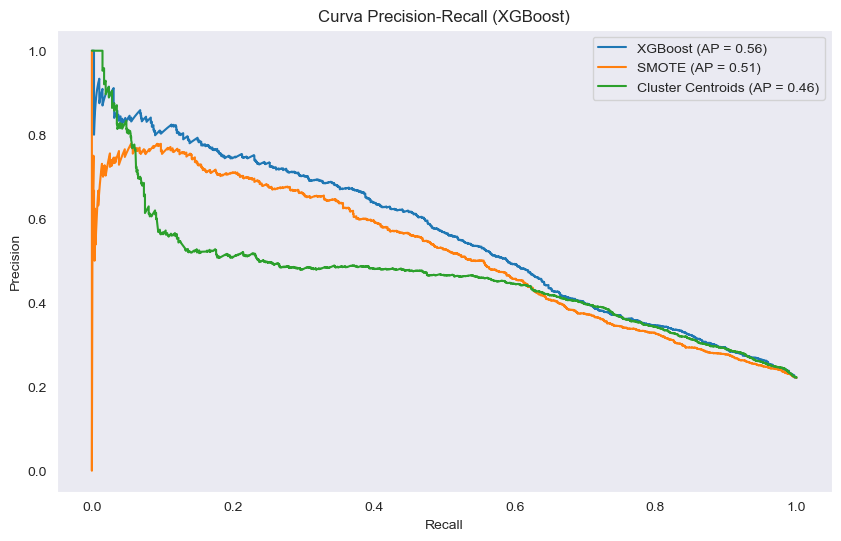

In [321]:
pipelines = {
    "XGBoost": Pipeline([
        ('model', XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, scale_pos_weight=len(y_train_def[y_train_def==0])/len(y_train_def[y_train_def==1])))
    ]),
    "SMOTE": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1))
    ]),
    "Cluster Centroids": ImbPipeline([
        ('cluster', ClusterCentroids(random_state=42, sampling_strategy=0.4)),
        ('model', XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, scale_pos_weight=len(y_train_def[y_train_def==0])/len(y_train_def[y_train_def==1])))
    ])
}

plt.figure(figsize=(10, 6))
for name, pipeline in pipelines.items():
    pipeline.fit(X_train_def, y_train_def)
    y_pred_proba = pipeline.predict_proba(X_test_def)[:, 1] 
    precision, recall, _ = precision_recall_curve(y_test_def, y_pred_proba)
    ap = average_precision_score(y_test_def, y_pred_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')
    print(f"{name} Classification Report:\n", classification_report(y_test_def, pipeline.predict(X_test_def)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (XGBoost)')
plt.legend()
plt.grid()
plt.show()

Se comparan los mejores resultados de cada conjunto de modelos

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      4673
           1       0.46      0.64      0.53      1327

    accuracy                           0.75      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.75      0.77      6000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      4673
           1       0.50      0.58      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000

Reg Log + Scaler Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      4673
           1       0.45      0.58      0.51      1327

    accuracy                           0.75      6000
   macro avg     

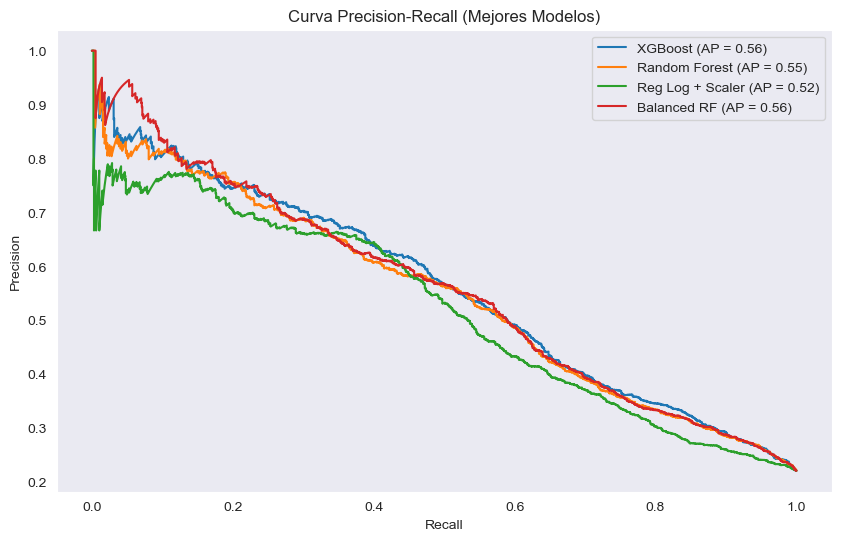

In [322]:
pipelines = {
    "XGBoost": Pipeline([
        ('model', XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, scale_pos_weight=len(y_train_def[y_train_def==0])/len(y_train_def[y_train_def==1])))
    ]),
    "Random Forest": Pipeline([
        ('model', RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, n_estimators=100))
    ]),
    "Reg Log + Scaler": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42, class_weight='balanced', max_iter=100))
    ]),
    "Balanced RF": Pipeline([
        ('model', BalancedRandomForestClassifier(random_state=42, max_depth=10, bootstrap=False, sampling_strategy='all', replacement=True))
    ])
}

plt.figure(figsize=(10, 6))
for name, pipeline in pipelines.items():
    pipeline.fit(X_train_def, y_train_def)
    y_pred_proba = pipeline.predict_proba(X_test_def)[:, 1] 
    precision, recall, _ = precision_recall_curve(y_test_def, y_pred_proba)
    ap = average_precision_score(y_test_def, y_pred_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')
    print(f"{name} Classification Report:\n", classification_report(y_test_def, pipeline.predict(X_test_def)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Mejores Modelos)')
plt.legend()
plt.grid()
plt.show()

# Conclusión

Se selecciona el modelo XGBoost al contar con el resultado más balanceado pues cuenta con una precisión promedio de 0.56 y un F1-score 0.53. Se destaca el valor del recall en este modelo, pues logra capturar al 64% de los clientes que pueden incurrir en impago, lo cual minimiza el riesgo de otorgar crédito o préstamo a un cliente que no pagará. Sin embargo, esto podría implicar negar un crédito a un buen cliente, ya que sólo el 46% de las predicciones de incumplimiento fueron correctas, es decir, hubo falsas alarmas. Por lo que, dependiendo del objetivo y contexto del negocio, se podría valorar darle prioridad a una variable en específico; en este caso, se asume una baja tolerancia al riesgo aunque implique negar créditos/préstamos a clientes que si pagarán.

### PAY_AMT4

Al buscar predecir el monto del pago en el mes de junio, para prevenir data leak, se eliminan las variables que contengan información del mes de junio y los posteriores. Por lo que sólo nos quedaríamos con un dataset que contenga la información de los meses de abril y mayo.

In [325]:
df_pay = df_pay.drop(columns=['default', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3'])

Nuevamente se crean variables que busquen capturar los montos de los meses anteriores tanto para el estado de cuenta como para el monto del pago.

In [326]:
df_pay['avg_past_bill'] = df_pay[['BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df_pay['total_past_pay'] = df_pay[['PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
df_pay['avg_pay_amt'] = df_pay[['PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [327]:
y_pay = df_pay['PAY_AMT4']
X_pay = df_pay.drop(columns=['PAY_AMT4'])

X_train_pay, X_test_pay, y_train_pay, y_test_pay = train_test_split(X_pay, y_pay, test_size=0.2, random_state=42)

Se comienza con un modelo sencillo de regresión lineal para posteriormente hacer uso de modelos más complejos como XGBoost y una red neuronal de bajo coste computacional.

In [328]:
X_train_const = sm.add_constant(X_train_pay)
model = sm.OLS(y_train_pay, X_train_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               PAY_AMT4   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     405.3
Date:                Fri, 08 Aug 2025   Prob (F-statistic):               0.00
Time:                        04:41:41   Log-Likelihood:            -2.6479e+05
No. Observations:               24000   AIC:                         5.296e+05
Df Residuals:                   23988   BIC:                         5.297e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            540.9785    772.262      0.

In [329]:
model_xgb = XGBRegressor(random_state=42, n_estimators=400, max_depth=3, learning_rate=0.01, subsample=0.8)
model_xgb.fit(X_train_pay, y_train_pay)
y_pred_xgb = model_xgb.predict(X_test_pay)

mse = mean_squared_error(y_test_pay, y_pred_xgb)
r2 = r2_score(y_test_pay, y_pred_xgb)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 60246836.45566923
R^2 Score: 0.631992259925716


In [330]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pay)
X_test_scaled = scaler.transform(X_test_pay)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train_pay, 
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=1)

y_pred_nn = model.predict(X_test_scaled).flatten()
print("MSE:", mean_squared_error(y_test_pay, y_pred_nn))
print("R2:", r2_score(y_test_pay, y_pred_nn))

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 263186576.0000 - val_loss: 262557392.0000
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 202041728.0000 - val_loss: 249194736.0000
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 209226896.0000 - val_loss: 248042208.0000
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 242151920.0000 - val_loss: 247408832.0000
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 201150736.0000 - val_loss: 246766960.0000
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 259312768.0000 - val_loss: 246399936.0000
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 225307952.0000 - val_loss: 245673824.0000
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180280272.0000 - val_loss: 244915568.0000
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239491920.0000 - val_loss: 244224496.0000
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 204958688.0

En conclusión, tanto el modelo XGBoost como la red neuronal mejoraron significativamente el modelo de regresión lineal. El R2 es muy similar en ambos casos, aunque el XGBoost es ligeramente mejor. Es decir, nos quedamos con este modelo pues requiere de un menor coste computacional y cuenta con un R2 de 63.2%.